### Multi-Linear

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

df = pd.read_csv("Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
df.duplicated().sum()

127

In [6]:
df.drop_duplicates(inplace=True)

In [11]:
X = df.drop(['Performance Index'], axis=1)
y = df['Performance Index']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
8591,5,71,No,4,4
9120,2,57,Yes,7,1
4112,1,49,No,4,0
811,3,58,Yes,6,1
6848,3,80,No,8,8
...,...,...,...,...,...
5771,2,46,No,6,5
5221,9,60,Yes,4,3
5424,5,95,Yes,5,6
860,1,47,No,9,0


In [20]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
le = LabelEncoder()
X_train['Extracurricular Activities'] = le.fit_transform(X_train['Extracurricular Activities'])

In [21]:
X_test['Extracurricular Activities'] = le.transform(X_test['Extracurricular Activities'])

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

In [30]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9887391160677558, 0.9884301209927054)

In [31]:
from sklearn.metrics import mean_squared_error
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)

(4.144574536244127, 4.305900938538479)

## Polynomial Data

In [35]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [42]:
X = df['Level'].values
y = df['Salary'].values

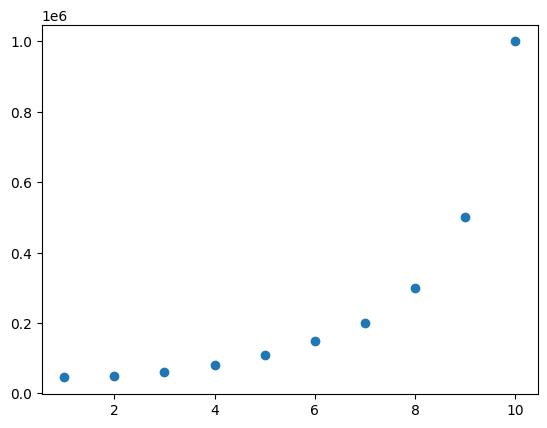

In [43]:
import matplotlib.pyplot as plt
plt.scatter(X, y);

In [44]:
model = LinearRegression()
model.fit(X.reshape(-1,1), y)
model.score(X.reshape(-1,1), y)

0.6690412331929895

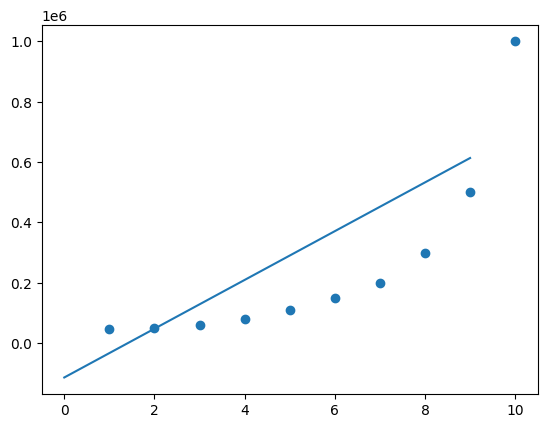

In [47]:
pred = model.predict(X.reshape(-1,1))
plt.scatter(X, y)
plt.plot(pred);

In [54]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(4)
X_poly = poly.fit_transform(X.reshape(-1,1))

In [55]:
model.fit(X_poly, y)
model.score(X_poly, y)

0.9973922891706614

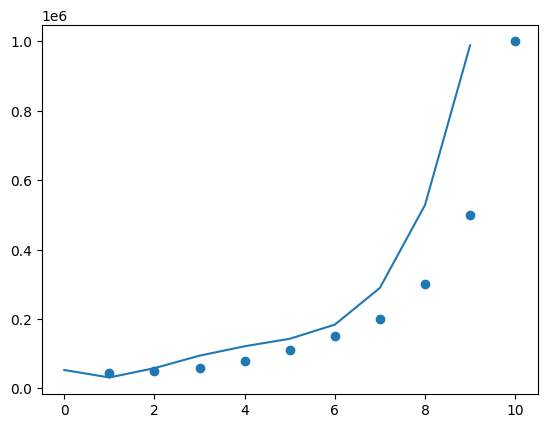

In [56]:
pred = model.predict(X_poly)
plt.scatter(X, y)
plt.plot(pred);